In [27]:
#Importación de librerías
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os

os.chdir(r"C:\Users\Nefi\OneDrive\Documentos\09-EBAC\EBACMX-DATA-ANALYST\Referencias")


In [11]:
#Lectura de archivo
df = pd.read_csv("supermarket_sales.csv")

# Vista rápida
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [12]:
#Estadística descriptiva
# Conversión de columnas a arrays NumPy
unit_price = df['Unit price'].to_numpy()
quantity = df['Quantity'].to_numpy()

In [13]:
#Estadística descriptiva
# UNIT PRICE
up_mean = np.mean(unit_price)
up_median = np.median(unit_price)
up_values, up_counts = np.unique(unit_price, return_counts=True)
up_mode = up_values[np.argmax(up_counts)]

In [14]:
#Estadística descriptiva
# QUANTITY
q_mean = np.mean(quantity)
q_median = np.median(quantity)
q_values, q_counts = np.unique(quantity, return_counts=True)
q_mode = q_values[np.argmax(q_counts)]

In [16]:
#Estadística descriptiva
print("UNIT PRICE")
print(f"Media: {up_mean:.2f}")
print(f"Mediana: {up_median:.2f}")
print(f"Moda: {up_mode:.2f}")

print("\nQUANTITY")
print(f"Media: {q_mean:.2f}")
print(f"Mediana: {q_median:.2f}")
print(f"Moda: {q_mode:.2f}")

UNIT PRICE
Media: 55.67
Mediana: 55.23
Moda: 83.77

QUANTITY
Media: 5.51
Mediana: 5.00
Moda: 10.00


In [17]:
#Tiket promedio-Por ciudad
ticket_ciudad = df.groupby('City')['Total'].mean().reset_index()
ticket_ciudad

,City,Total
0,Mandalay,319.872506
1,Naypyitaw,337.099715
2,Yangon,312.354031


In [18]:
#Tiket promedio-Por product line y ciudad
ticket_prod_ciudad = df.groupby(['Product line','City'])['Total'].mean().reset_index()
ticket_prod_ciudad

,Product line,City,Total
0,Electronic accessories,Mandalay,310.026245
1,Electronic accessories,Naypyitaw,344.890445
2,Electronic accessories,Yangon,305.285225
3,Fashion accessories,Mandalay,264.730911
4,Fashion accessories,Naypyitaw,331.693385
5,Fashion accessories,Yangon,320.245265
6,Food and beverages,Mandalay,304.297770
7,Food and beverages,Naypyitaw,360.103864
8,Food and beverages,Yangon,295.915526
9,Health and beauty,Mandalay,376.993585


In [19]:
#Tiket promedio-Por género
ticket_genero = df.groupby('Gender')['Total'].mean().reset_index()
ticket_genero

,Gender,Total
0,Female,335.095659
1,Male,310.789226


In [20]:
#Tiket promedio-Por género y product line
ticket_genero_prod = df.groupby(['Gender','Product line'])['Total'].mean().reset_index()
ticket_genero_prod

,Gender,Product line,Total
0,Female,Electronic accessories,322.643125
1,Female,Fashion accessories,317.056250
2,Female,Food and beverages,368.565750
3,Female,Health and beauty,290.015414
4,Female,Home and lifestyle,380.213639
5,Female,Sports and travel,324.712739
6,Male,Electronic accessories,316.691965
7,Male,Fashion accessories,291.079207
8,Male,Food and beverages,273.499125
9,Male,Health and beauty,348.099460


In [22]:
#Top 5-Ventas por ciudad
#Primero se calculan las ventas totales
total_ventas = df['Total'].sum()

ventas_ciudad = df.groupby('City')['Total'].sum().reset_index()

ventas_ciudad['rank'] = ventas_ciudad['Total'].rank(method='dense', ascending=False)
ventas_ciudad['%_aporte'] = (ventas_ciudad['Total'] / total_ventas) * 100

top5_ciudad = ventas_ciudad.sort_values('rank').head(5)
top5_ciudad

,City,Total,rank,%_aporte
1,Naypyitaw,110568.7065,1.0,34.235322
2,Yangon,106200.3705,2.0,32.882757
0,Mandalay,106197.6720,3.0,32.881921


In [23]:
#Top 5-Ventas por Member
ventas_member = df.groupby('Customer type')['Total'].sum().reset_index()

ventas_member['rank'] = ventas_member['Total'].rank(method='dense', ascending=False)
ventas_member['%_aporte'] = (ventas_member['Total'] / total_ventas) * 100

ventas_member.sort_values('rank').head(5)

,Customer type,Total,rank,%_aporte
0,Member,164223.444,1.0,50.848406
1,Normal,158743.305,2.0,49.151594


In [24]:
#Top 5-Ventas por Payment
ventas_payment = df.groupby('Payment')['Total'].sum().reset_index()

ventas_payment['rank'] = ventas_payment['Total'].rank(method='dense', ascending=False)
ventas_payment['%_aporte'] = (ventas_payment['Total'] / total_ventas) * 100

ventas_payment.sort_values('rank').head(5)

,Payment,Total,rank,%_aporte
0,Cash,112206.570,1.0,34.742453
2,Ewallet,109993.107,2.0,34.057099
1,Credit card,100767.072,3.0,31.200448


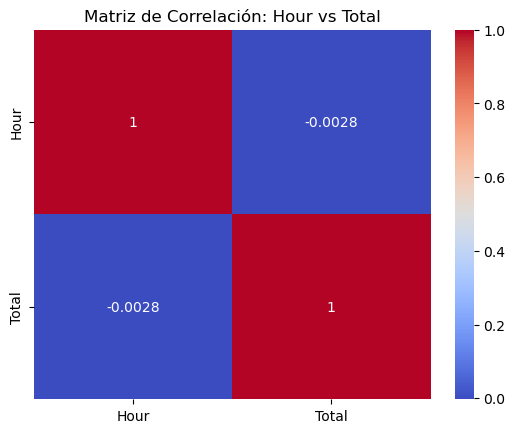

In [28]:
#Matrices por correlación-Hora vs Total
corr_hour_total = np.corrcoef(df['Hour'], df['Total'])

plt.figure()
sns.heatmap(corr_hour_total, 
            annot=True, 
            cmap="coolwarm",
            xticklabels=['Hour','Total'],
            yticklabels=['Hour','Total'])

plt.title("Matriz de Correlación: Hour vs Total")
plt.show()

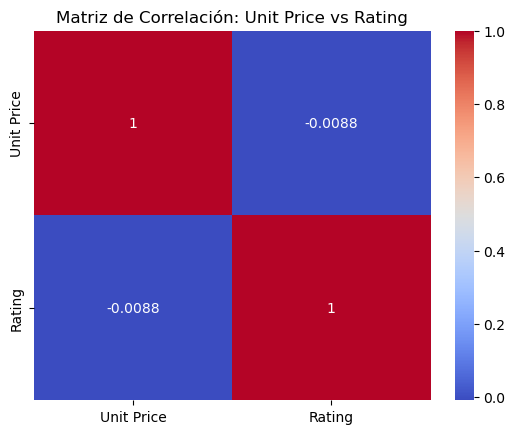

In [29]:
#Matrices por correlación-Unit price vs rating
corr_price_rating = np.corrcoef(df['Unit price'], df['Rating'])

plt.figure()
sns.heatmap(corr_price_rating, 
            annot=True, 
            cmap="coolwarm",
            xticklabels=['Unit Price','Rating'],
            yticklabels=['Unit Price','Rating'])

plt.title("Matriz de Correlación: Unit Price vs Rating")
plt.show()